<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/Week_1_practice_Pandas_Tutorial_(Dimorphism).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This tutorial goes over the same methods we discussed in class, but with a new dataset and an extended anotation to help follow what's going on. Go through each step on your own, and be sure to try the exercise at the end as well.*

# Pandas Data processing example

(example adapoted from Stephen J. Guy and https://github.com/maxhumber/redframes)

---



We first need to download a CSV file with the data we wish to process. I've made a file with some data on bears here: https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/Bears.csv

We'll use the Pandas (Python Data Analysis) library to move the data from the CSV file format into a dataframe. A dataframe is a bit like an array, but with more flexabilty for how you access, store, and manipulate the data.

In [ ]:
import pandas as pd

You can directly write data into a data frame as is show below, but it's more fun to use the data we downloaded from the web.

In [ ]:
# You can make a dataframe directly rather than downloading it like this:
# df = pd.DataFrame({
#     'bear': ['Brown bear', 'Polar bear', 'Asian black bear', 'American black bear', 'Sun bear', 'Sloth bear', 'Spectacled bear', 'Giant panda'],
#     'genus': ['Ursus', 'Ursus', 'Ursus', 'Ursus', 'Helarctos', 'Melursus', 'Tremarctos', 'Ailuropoda'],
#     'weight (male, lbs)': ['300-860', '880-1320', '220-440', '125-500', '60-150', '175-310', '220-340', '190-275'],
#     'weight (female, lbs)': ['205-455', '330-550', '110-275', '90-300', '45-90', '120-210', '140-180', '155-220']
# })

The Pandas read_csv function can either take as input a file name or a buffer. If you were running this on your laptop it might look like `df = pd.read_csv("C:/data/bears.csv")`

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/refs/heads/main/Bears.csv")

This created a dataframe named `df` with all of our bear data.

Jupyter notesbooks will automatically print the last line of a code block. We can use this to really print out the dataframe ... look how nicely formated it is.

In [ ]:
df

,,bear,genus,"weight (male, lbs)","weight (female, lbs)"
0,0,Brown bear,Ursus,300-860,205-455
1,1,Polar bear,Ursus,880-1320,330-550
2,2,Asian black bear,Ursus,220-440,110-275
3,3,American black bear,Ursus,125-500,90-300
4,4,Sun bear,Helarctos,60-150,45-90
5,5,Sloth bear,Melursus,175-310,120-210
6,6,Spectacled bear,Tremarctos,220-340,140-180
7,7,Giant panda,Ailuropoda,190-275,155-220


Data frames can let you access any of the column using a "name.col" syntax.

In [ ]:
df.bear

,bear
0,Brown bear
1,Polar bear
2,Asian black bear
3,American black bear
4,Sun bear
5,Sloth bear
6,Spectacled bear
7,Giant panda


... but many find that syntax a bit confusing. More common is to treat the dataframe as an array where colums can be accessed by their names:

In [ ]:
df['bear']

,bear
0,Brown bear
1,Polar bear
2,Asian black bear
3,American black bear
4,Sun bear
5,Sloth bear
6,Spectacled bear
7,Giant panda


We can also access multiple columns at once by using a list:

In [ ]:
df[['bear','weight (male, lbs)']]

,bear,"weight (male, lbs)"
0,Brown bear,300-860
1,Polar bear,880-1320
2,Asian black bear,220-440
3,American black bear,125-500
4,Sun bear,60-150
5,Sloth bear,175-310
6,Spectacled bear,220-340
7,Giant panda,190-275


Pandas has many ways to manipulate dataframes. Here we rename some columns something simpler to type.

Don't forget to save the output of the `rename` function back to a dataframe variable!

In [ ]:
df = df.rename(columns={"weight (male, lbs)": "male", "weight (female, lbs)": "female"})

Our dataframe now has a "male" column rather than the longer "weight (male, lbs)".

In [ ]:
df[['bear','male']]

,bear,male
0,Brown bear,300-860
1,Polar bear,880-1320
2,Asian black bear,220-440
3,American black bear,125-500
4,Sun bear,60-150
5,Sloth bear,175-310
6,Spectacled bear,220-340
7,Giant panda,190-275


We have a female column too!

In [ ]:
df[['bear','male','female']]

,bear,male,female
0,Brown bear,300-860,205-455
1,Polar bear,880-1320,330-550
2,Asian black bear,220-440,110-275
3,American black bear,125-500,90-300
4,Sun bear,60-150,45-90
5,Sloth bear,175-310,120-210
6,Spectacled bear,220-340,140-180
7,Giant panda,190-275,155-220


Pandas has a very cool `melt` command that lets us reshape the dataframe to move information that was stored in colums to be stored in rows instead.

In [ ]:
pd.melt(df, id_vars=['bear', 'genus'], value_vars=['male', 'female'], var_name='sex', value_name='weight')

,bear,genus,sex,weight
0,Brown bear,Ursus,male,300-860
1,Polar bear,Ursus,male,880-1320
2,Asian black bear,Ursus,male,220-440
3,American black bear,Ursus,male,125-500
4,Sun bear,Helarctos,male,60-150
5,Sloth bear,Melursus,male,175-310
6,Spectacled bear,Tremarctos,male,220-340
7,Giant panda,Ailuropoda,male,190-275
8,Brown bear,Ursus,female,205-455
9,Polar bear,Ursus,female,330-550


Lets save the `melt`ed results in the `df` variable before making a few more changes.

In [ ]:
df = pd.melt(df, id_vars=['bear', 'genus'], value_vars=['male', 'female'], var_name='sex', value_name='weight')

The pandas `str.split` function lets us split up the values of the "weight" column into two.

In [ ]:
df["weight"].str.split("-", expand=True)

,0,1
0,300,860
1,880,1320
2,220,440
3,125,500
4,60,150
5,175,310
6,220,340
7,190,275
8,205,455
9,330,550


We can store these values in new, named colums

In [ ]:
df[["min", "max"]] = df["weight"].str.split("-", expand=True)
df

,bear,genus,sex,weight,min,max
0,Brown bear,Ursus,male,300-860,300,860
1,Polar bear,Ursus,male,880-1320,880,1320
2,Asian black bear,Ursus,male,220-440,220,440
3,American black bear,Ursus,male,125-500,125,500
4,Sun bear,Helarctos,male,60-150,60,150
5,Sloth bear,Melursus,male,175-310,175,310
6,Spectacled bear,Tremarctos,male,220-340,220,340
7,Giant panda,Ailuropoda,male,190-275,190,275
8,Brown bear,Ursus,female,205-455,205,455
9,Polar bear,Ursus,female,330-550,330,550


Now that we have the min and the max values we can safely `drop` the original "weight" column if we wish.

In [ ]:
df = df.drop("weight", axis=1)
df

,bear,genus,sex,min,max
0,Brown bear,Ursus,male,300,860
1,Polar bear,Ursus,male,880,1320
2,Asian black bear,Ursus,male,220,440
3,American black bear,Ursus,male,125,500
4,Sun bear,Helarctos,male,60,150
5,Sloth bear,Melursus,male,175,310
6,Spectacled bear,Tremarctos,male,220,340
7,Giant panda,Ailuropoda,male,190,275
8,Brown bear,Ursus,female,205,455
9,Polar bear,Ursus,female,330,550


Lets try that `melt` operation again. This time we'll melt the min and max weight information into a single value called `weight`, with a new column called `stat` the notes if this is the min weight or the max weight.

We currently have 16 rows (0-16), before pressing run, guess how many rows we will have after the melt operation!

In [ ]:
df = pd.melt(df, id_vars=['bear', 'genus', 'sex'], value_vars=['min', 'max'], var_name='stat', value_name='weight')
df

,bear,genus,sex,stat,weight
0,Brown bear,Ursus,male,min,300
1,Polar bear,Ursus,male,min,880
2,Asian black bear,Ursus,male,min,220
3,American black bear,Ursus,male,min,125
4,Sun bear,Helarctos,male,min,60
5,Sloth bear,Melursus,male,min,175
6,Spectacled bear,Tremarctos,male,min,220
7,Giant panda,Ailuropoda,male,min,190
8,Brown bear,Ursus,female,min,205
9,Polar bear,Ursus,female,min,330


Ok, it's time to do a bit of numerical processing to this data. As a first step we have to lets Padas know that the `"weight"` column stores floating point values (by default, Pandas assumes all values are string).

In [ ]:
df['weight'] = df["weight"].astype('float')

We can now use the `groupby` command to group the weight data by the name and sex of the bear species.

Here we also use the `mean` command to take the average of the min and max values resulting from the groupby command.

In [ ]:
df = df.groupby(["bear", "sex"])["weight"].mean()
df

bear                 sex   
American black bear  female     195.0
                     male       312.5
Asian black bear     female     192.5
                     male       330.0
Brown bear           female     330.0
                     male       580.0
Giant panda          female     187.5
                     male       232.5
Polar bear           female     440.0
                     male      1100.0
Sloth bear           female     165.0
                     male       242.5
Spectacled bear      female     160.0
                     male       280.0
Sun bear             female      67.5
                     male       105.0
Name: weight, dtype: float64

This looks nice, but notice the formatting is a bit odd. This is because `groupby` removed the index information for the dataframe. We can get it back with the `reset_index` function.

In [ ]:
df = df.reset_index()
df

,bear,sex,weight
0,American black bear,female,195.0
1,American black bear,male,312.5
2,Asian black bear,female,192.5
3,Asian black bear,male,330.0
4,Brown bear,female,330.0
5,Brown bear,male,580.0
6,Giant panda,female,187.5
7,Giant panda,male,232.5
8,Polar bear,female,440.0
9,Polar bear,male,1100.0


Our last big step is to make a `pivot_table` call. This is essentially to oposite of `melt`. We take data spread across rows and move it to a column.

Here we take the male and female weight data and place it in a column.

In [ ]:
df = pd.pivot_table(df, index=['bear'], columns=['sex'], values='weight')
df

sex,female,male
bear,,
American black bear,195.0,312.5
Asian black bear,192.5,330.0
Brown bear,330.0,580.0
Giant panda,187.5,232.5
Polar bear,440.0,1100.0
Sloth bear,165.0,242.5
Spectacled bear,160.0,280.0
Sun bear,67.5,105.0


Let's get that index back again.

In [ ]:
df = df.reset_index()
df

sex,bear,female,male
0,American black bear,195.0,312.5
1,Asian black bear,192.5,330.0
2,Brown bear,330.0,580.0
3,Giant panda,187.5,232.5
4,Polar bear,440.0,1100.0
5,Sloth bear,165.0,242.5
6,Spectacled bear,160.0,280.0
7,Sun bear,67.5,105.0


Oops, the index column is named "sex", lets fix that.

In [ ]:
df = df.rename_axis(None, axis=1)
df

,bear,female,male
0,American black bear,195.0,312.5
1,Asian black bear,192.5,330.0
2,Brown bear,330.0,580.0
3,Giant panda,187.5,232.5
4,Polar bear,440.0,1100.0
5,Sloth bear,165.0,242.5
6,Spectacled bear,160.0,280.0
7,Sun bear,67.5,105.0


---
## Ploting Data

Pandas has some basic built-in data ploting capabilities. Here, we use the `scatter` command to make a scatter plot.

<Axes: xlabel='male', ylabel='female'>

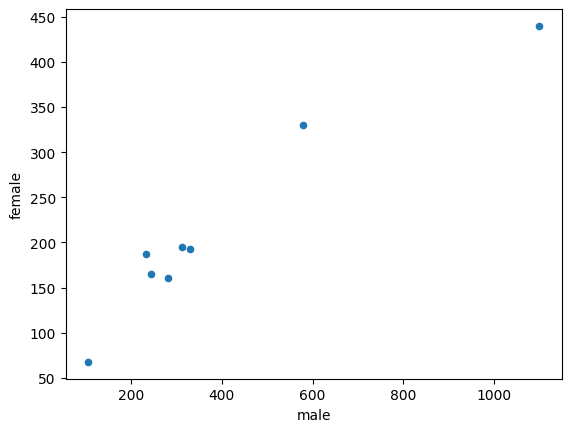

In [ ]:
df.plot.scatter(x='male',y='female')

<Axes: xlabel='male', ylabel='female'>

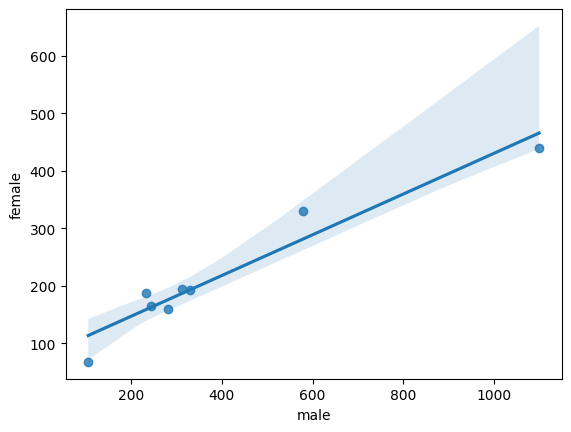

In [ ]:
import seaborn as sns

sns.regplot(x=df.male,y=df.female)

<Axes: xlabel='male', ylabel='female'>

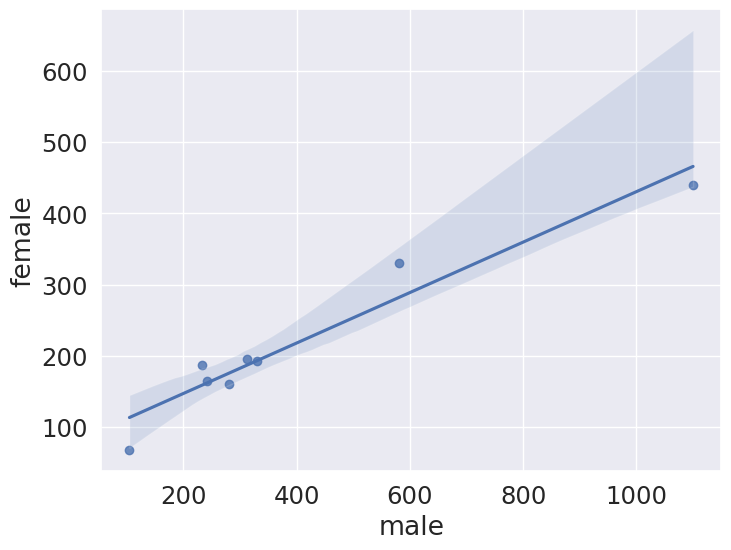

In [ ]:
# figure size in inches
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
sns.set(font_scale=1.6)

sns.regplot(x=df.male,y=df.female)

Sexual dimorphism is when the male and female members of a species are different physically. Lets can make a new colum storing the weight dimorphism in bears.

In [ ]:
df["dimorphism"] = round(df["male"] / df["female"], 2)
df

,bear,female,male,dimorphism
0,American black bear,195.0,312.5,1.60
1,Asian black bear,192.5,330.0,1.71
2,Brown bear,330.0,580.0,1.76
3,Giant panda,187.5,232.5,1.24
4,Polar bear,440.0,1100.0,2.50
5,Sloth bear,165.0,242.5,1.47
6,Spectacled bear,160.0,280.0,1.75
7,Sun bear,67.5,105.0,1.56


We can sort to data so we can quickly see what species has the most dimorphism is size.

In [ ]:
df = df.sort_values("dimorphism", ascending=False)
df

,bear,female,male,dimorphism
4,Polar bear,440.0,1100.0,2.50
2,Brown bear,330.0,580.0,1.76
6,Spectacled bear,160.0,280.0,1.75
1,Asian black bear,192.5,330.0,1.71
0,American black bear,195.0,312.5,1.60
7,Sun bear,67.5,105.0,1.56
5,Sloth bear,165.0,242.5,1.47
3,Giant panda,187.5,232.5,1.24


Oops, lets fix the indicies again (setting `drop=True` makes new a new index set rather than trying to keep around the old one).

In [ ]:
df = df.reset_index(drop=True)
df

,bear,female,male,dimorphism
0,Polar bear,440.0,1100.0,2.50
1,Brown bear,330.0,580.0,1.76
2,Spectacled bear,160.0,280.0,1.75
3,Asian black bear,192.5,330.0,1.71
4,American black bear,195.0,312.5,1.60
5,Sun bear,67.5,105.0,1.56
6,Sloth bear,165.0,242.5,1.47
7,Giant panda,187.5,232.5,1.24


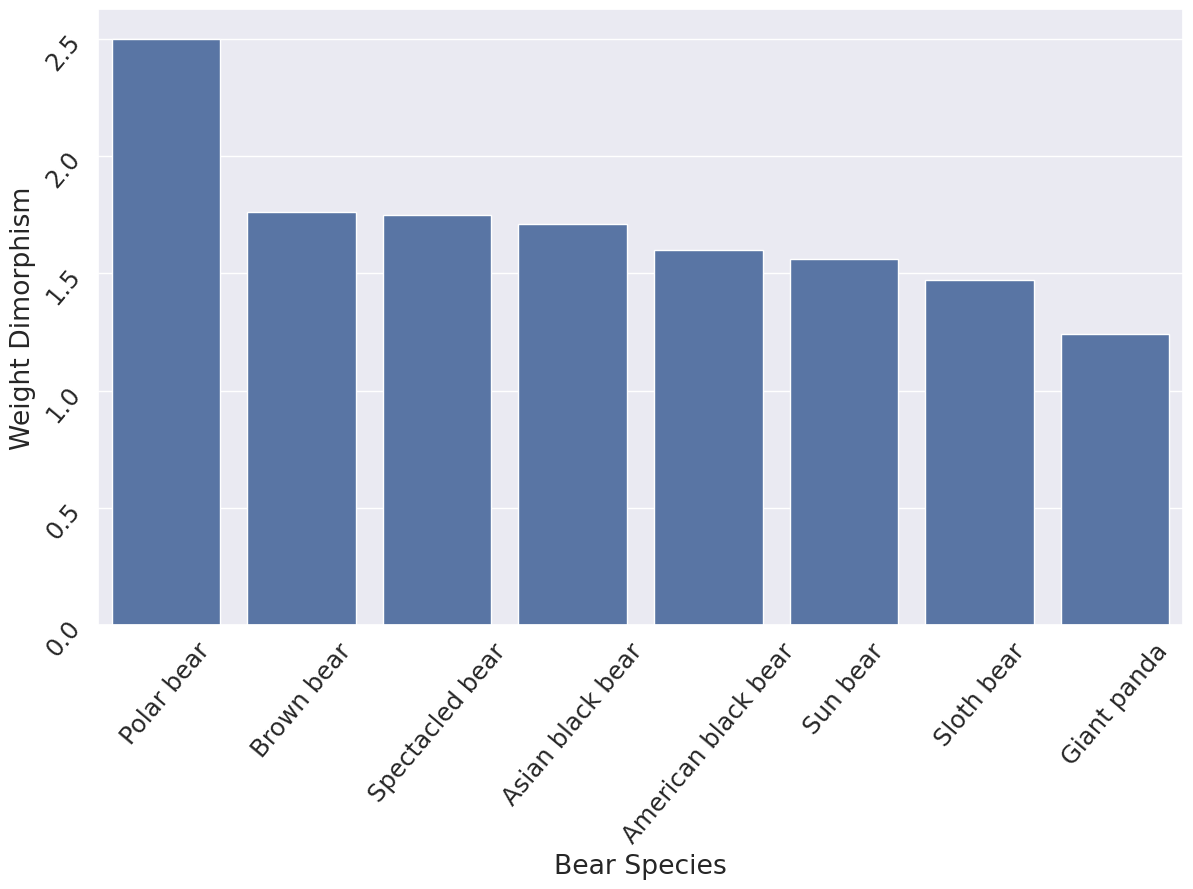

In [ ]:
# from matplotlib import rcParams
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
graph = sns.barplot(data=df, x="bear",y="dimorphism")
graph.set(xlabel='Bear Species', ylabel='Weight Dimorphism')
graph.tick_params(rotation=50)

**[EXERCISE]**
Try it yourself, can you make a vertical graph?

Hint: It's just a single line of code `sns.barplot(...)`

In [ ]:
#Your code here....

---
Before we wrap up, lets save the results of our dimorphism computation in a new CSV file.

First, let's drop the gender weight and just keep the dimorphism value.

In [ ]:
df = df.drop(["female", "male"], axis=1)
df

,bear,dimorphism
0,Polar bear,2.50
1,Brown bear,1.76
2,Spectacled bear,1.75
3,Asian black bear,1.71
4,American black bear,1.60
5,Sun bear,1.56
6,Sloth bear,1.47
7,Giant panda,1.24


In [ ]:
# df.to_csv() #returns the csv file as a the string
df.to_csv("bear_dimorphism.csv") #saves the result to a csv file



---

Pandas is very popular but it has some real limitations.

See this essary for a rant about common issues that confuse many pandas users: https://hackernoon.com/why-are-we-teaching-pandas-instead-of-sql

The redframe project tries to provide a nicer interface. You can see their take on the bear diamorphism problem here: https://github.com/maxhumber/redframes

The polars project is growing in popularity and is blazingly fast: https://www.pola.rs/

If you have massive datasets with compute spanning over large clusters of computer check out PySpark: https://sparkbyexamples.com/pyspark-tutorial/

